### Student Information
Name:吳花瑜

Student ID:114065534

GitHub ID:huayu1115

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### import 所需套件
import math
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

In [2]:
# 導入資料集
df = pd.read_csv('newdataset\Reddit-stock-sentiment.csv')
# 嘗試印出
print(df.iloc[0:2, 0:4])

      type             datetime  post_id       subreddit
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets


In [3]:
# 查看資料長度
print(len(df))

847


In [4]:
# 列出所有欄位名稱
print(df.columns.tolist())

['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


### **>>> Exercise 1:**  印出前三筆資料的 text 欄位

In [5]:
# print out the *text* data for the first three samples in the dataset
for i in range(3):
    print(f'example {i+1}')
    print(df.text[i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


### **>>> Exercise 2:**  其他查詢技巧


In [6]:
# Experiment with other querying techniques
df[:16:3][['title','author','type']]

title        author     type
0     Retardation is on the menu boys! WSB is so back  StickyTip420  comment
3                               Who knows more? $VMAR     emiljenfn     post
6         Is the market in complete denial right now?     stoniey84  comment
9                         Any cheap stocks under $10?        Zumuru  comment
12  U.S. 10-year Treasury yields rise as Trump tar...    JBallMan23  comment
15  It's fucking awful seeing the "Silver" misinfo...  nerokaeclone  comment

### **>>> Exercise 3:**  條件查詢後取前五筆資料


In [7]:
# fetch records (type == post), and query every 10th record. Only show the first 5 records.
df[df['type'] == 'post'][::10][:5]

type             datetime  post_id         subreddit  \
3    post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
165  post  2025-04-09 14:01:01  1jv6i3y  stockstobuytoday   
332  post  2025-04-11 18:25:25  1jwwv42    wallstreetbets   
421  post  2025-03-31 14:05:30  1jo3zpc  stockstobuytoday   
487  post   2021-12-25 0:40:59   rnypxo  stockstobuytoday   

                         title          author  \
3        Who knows more? $VMAR       emiljenfn   
165        Established Uptrend   AutoModerator   
332  $75k+ In Gains (300% YTD)       KatBoss01   
421    Stock Gainers for Today         saasfin   
487    Deep value vs Dividend!  AnonymusFarmer   

                                                   url  upvotes  downvotes  \
3    https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
165  https://www.reddit.com/r/stockstobuytoday/comm...        1        0.0   
332             https://www.reddit.com/gallery/1jwwv42        5        0.0   
421  https://www.reddit.com/r/stockstobuytoday/comm...        1        0.0   
487  https://www.reddit.com/r/stockstobuytoday/comm...        9        0.0   

     upvote_ratio                                               text  \
3            0.98  Vision Marine Technologies Inc. is rewriting t...   
165          1.00  Stock list generated from technical Analysis. ...   
332          1.00     Mostly in MSTR calls, AAPL puts and GBTC long.   
421          1.00  Stocks that are trending up today\r\n\r\n [Pop...   
487          0.91  Good Morning Investors, \r\n\r\nI am a young F...   

     subjectivity  polarity  sentiment  \
3         0.64697  0.216383        1.0   
165       0.10000  0.000000        0.0   
332       0.45000  0.225000        1.0   
421       0.00000  0.000000        0.0   
487       0.41903  0.119152        1.0   

                                              entities  label  
3    ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0  
165  ['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....    0.0  
332                           ['GBTC', 'MSTR', 'AAPL']    1.0  
421      [']', 'Popping', 'stockbuyvest.com', 'today']    0.0  
487  ['student', 'someone', 'x200B', 'dividend', 'w...    0.0

### **>>> Exercise 4:**  Row 的缺失資料總和


In [8]:
# calculate the missing values in every record instead of every column
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### **>>> Exercise 5:**  explain why `.isnull()` didn't work (Can skip)


### **>>> Exercise 6:**  對資料集抽樣


In [9]:
# Sampling
df_sample = df.sample(n=500)
df_sample.sort_index()[:3]

type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   

   subjectivity  polarity  sentiment                               entities  \
0      1.000000 -0.900000       -1.0                                     []   
1      0.177778  0.083333        1.0  ['Stunt', 'company', 'deal', 'place']   
2      0.000000  0.000000        0.0                             ['ticker']   

   label  
0   -1.0  
1    0.0  
2    0.0

### **>>> Exercise 7:**  樣本中各個 label 的數目，並畫出長條圖


sentiment
 0.0    209
 1.0    178
-1.0    113
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='label_str'>

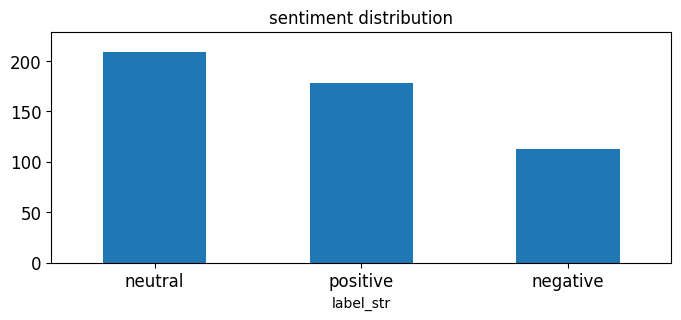

In [10]:
# 建立 label 的對應關係
label_map = {
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
}
df_sample['label_str'] = df_sample['sentiment'].map(label_map)

# 計算各 label 的數量
print(df_sample.sentiment.value_counts())

# 畫圖
df_sample.label_str.value_counts().plot(kind = 'bar',
                                           title = 'sentiment distribution',
                                           ylim = [0, df_sample.label_str.value_counts().max()+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8:**  將整個資料集和抽樣的分布畫在一張長條圖上


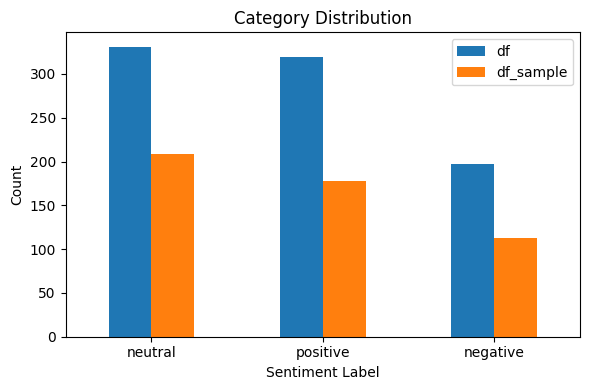

In [11]:
# 分別計算數量
df_counts = df['sentiment'].value_counts()
df_sample_counts = df_sample['sentiment'].value_counts()

# 利用 union 合併兩個集合，若有沒有的類別則補 0
categories = sorted(set(df_counts.index).union(set(df_sample_counts.index)))
df_counts = df_counts.reindex(categories, fill_value=0)
df_sample_counts = df_sample_counts.reindex(categories, fill_value=0)

# 轉換成 DataFrame
compare = pd.DataFrame({
    'df': df_counts,
    'df_sample': df_sample_counts
})

# 以總和排序
compare['total'] = compare['df'] + compare['df_sample']
compare = compare.sort_values(by='total', ascending=False)

# 對應 label 和 positive, neutral, negative
compare.index = compare.index.map(label_map)

# 畫圖（只畫 df 和 df_sample)
compare[['df', 'df_sample']].plot(kind='bar',
                                  figsize=(6, 4),
                                  rot=0,
                                  title='Category Distribution')

plt.ylabel('Count')
plt.xlabel('Sentiment Label')
plt.tight_layout()
plt.show()

### **>>> Exercise 9:**  建立 document-term matrix，並對第一筆資料測試


In [12]:
# 計算 df.text 的 document-term matrix
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

# 原本 document 1 的 text
print("第一筆資料的 text 是: ", df.loc[0,'text'])
print('\n')

# document1 的計算結果
print("fit transform 結果是:")
print(df_counts[0])
print('\n')

# document1 對應的 token
print("使用get_feature_names_out():")
print(count_vect.get_feature_names_out()[692])
print(count_vect.get_feature_names_out()[2706])
print(count_vect.get_feature_names_out()[3248])
print('\n')

# 或使用 analyzer()
print("使用 analyzer():")
analyze = count_vect.build_analyzer()
print(analyze(df.text[0]))

第一筆資料的 text 是:  Calls on retards


fit transform 結果是:
  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


使用get_feature_names_out():
calls
on
retards


使用 analyzer():
['calls', 'on', 'retards']


### **>>> Exercise 10:**  找出 document-term matrix 非零值的 index，並印出對應的詞


In [13]:
# 畫出前四筆資料的部分 document-term matrix
df_counts[0:4, 130:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0]])

In [14]:
# 第四筆資料有多個非零值，找出它們
arr = df_counts[3, 130:200].toarray()  # index start from 130
row_idx, col_idx = np.where(arr >= 1)
print("nonzero index: ", col_idx)

for i in col_idx:
    print(count_vect.get_feature_names_out()[i+130]) # we need to add 130 

nonzero index:  [45 65 66 67]
about
achieved
achievement
achieves


### **>>> Exercise 11:**  降低矩陣稀疏度，並畫出 heatmap


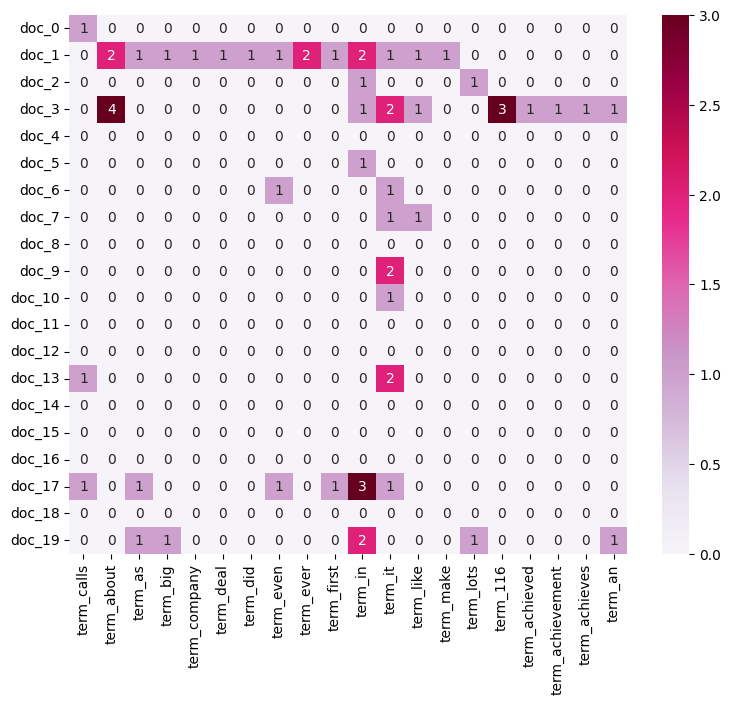

In [15]:
# 找出非零的行、列索引
arr = df_counts[0:20, 0:2500].toarray()  
row_idx, col_idx = np.where(arr > 0)

# 移除重複並保留順序，保留前 20 個
unique_col_idx = list(dict.fromkeys(col_idx))
unique_col_idx = unique_col_idx[:20]

# 設定 x 軸 y 軸
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[list(unique_col_idx)]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
# heatmap 中的值
plot_z = df_counts[0:20, list(unique_col_idx)].toarray()

# 打包成 dataframe
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# 畫圖
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

### **>>> Exercise 12:**  利用 plotly 畫圖


In [16]:
# 計算在所有文件中前20個字的頻率
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

# 打包成 dataframe
term_df = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# 畫圖
fig = px.bar(term_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 13:**  有效地減少想要視覺化的詞彙數量


In [17]:
# 找出所有文本單字出現頻率最高的 30 個單字

# 把單字和頻率打包成 dataframe
term_df = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:],
    'frequency': term_frequencies[:]
})

# 按照頻率降序排序，並取出前 30 個
sort_df = term_df.sort_values(by='frequency', ascending=False).head(30)

# 用 plotly.express 
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 14:**  依照詞彙頻率排序，畫出長尾圖


In [18]:
# 依照詞彙出現數量排序，取前400
sort_df = term_df.sort_values(by='frequency', ascending=False).head(400)

# 畫圖
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> Exercise 15:**  畫出對數分布圖

In [19]:
'''
說明:
對數分布，可以讓資料的變化更平滑、更容易比較出現頻率特別少和特別多的資料。
'''
# 將詞彙頻率轉換成 log 頻率
term_frequencies_log = [math.log(i) for i in term_frequencies]

# 把單字和 log 頻率打包成 dataframe
df_wf = pd.DataFrame({
    'word': count_vect.get_feature_names_out()[:],
    'frequency': term_frequencies_log[:]
})

# 按照頻率降序排序
sort_df = df_wf.sort_values(by='frequency', ascending=False).head(400)

# 畫圖
fig = px.bar(sort_df, y='frequency', x='word', text_auto='.2s')
fig.show()

### **>>> 嘗試新的資料視覺化技巧:** 

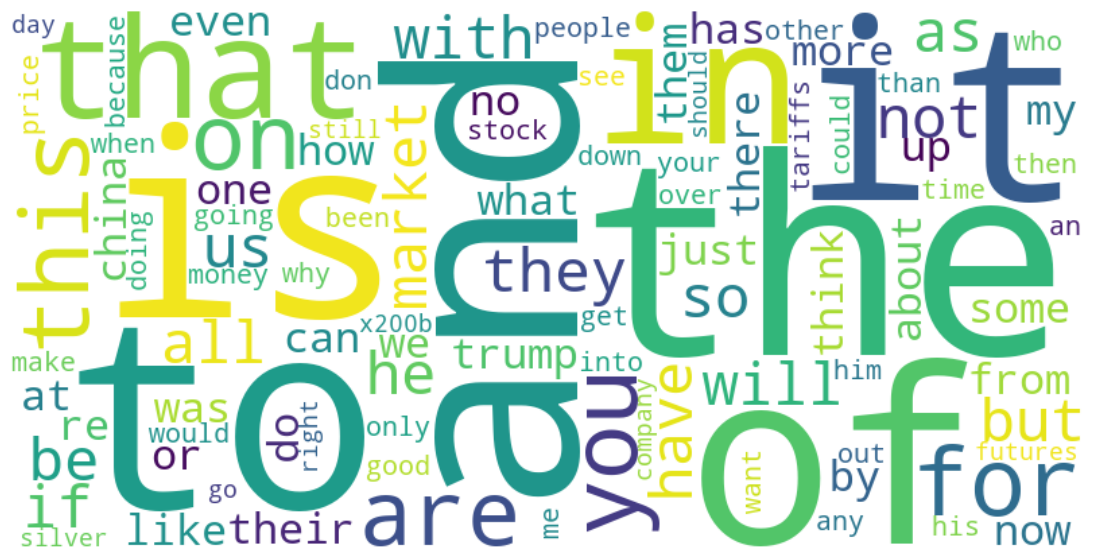

In [20]:
# Generate meaningful new data visualizations: wordcloud
from wordcloud import WordCloud

df_text = sort_df[:100]

# 建立詞頻字典 {word: frequency}
word_freq_dict = dict(zip(df_text['word'], df_text['frequency']))

# 建立文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# 顯示文字雲
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

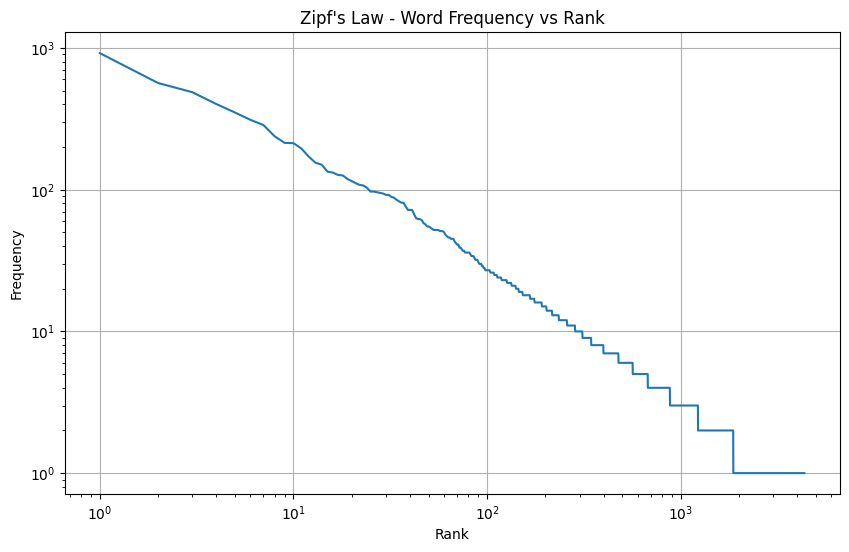

In [21]:
# Zipf's law : 一個單詞出現的頻率與它在頻率表裡的排名成反比
freqs = pd.Series(term_frequencies).sort_values(ascending=False)
ranks = np.arange(1, len(freqs)+1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, freqs.values)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law - Word Frequency vs Rank")
plt.grid(True)
plt.show()

# Phase 2

In [22]:
### import 所需套件
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

### 檢視類別個數 : 選擇使用 sentiment 因為數量比較均衡

In [23]:
labels = df['label'].unique()  # Get unique labels
label_dfs = {}
print('label 的類別', labels)

# label_dfs : 按照 label 分成三個dataframe
for label in labels:
    label_dfs[label] = df[df['label'] == label].copy()
for i in label_dfs:
    print(f'{i} 類別資料數: ',len(label_dfs[i]))

label 的類別 [-1.  0.  1.]
-1.0 類別資料數:  315
0.0 類別資料數:  423
1.0 類別資料數:  109


In [24]:
sentiments = df['sentiment'].unique()
print('sentiment 的類別', sentiments)
sentiment_dfs = {}
for sentiment in sentiments:
    sentiment_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()
for sentiment in sentiments:
    print(f'{sentiment} 類別資料數: ', len(sentiment_dfs[sentiment]))

sentiment 的類別 [-1.  1.  0.]
-1.0 類別資料數:  197
1.0 類別資料數:  319
0.0 類別資料數:  331


In [25]:
# 建立映射字典 對應label值到名稱
sentiment_mapping = {
    -1: 'negative',
     0: 'neutral',
     1: 'positive'
}
df['sentimentname'] = df['sentiment'].map(sentiment_mapping)
sentimentnames = df['sentimentname'].unique()
sentimentname_dfs = {}
for sentimentname in sentimentnames:
    sentimentname_dfs[sentimentname] = df[df['sentimentname'] == sentimentname].copy()
for sentimentname in sentimentnames:
    print(f'{sentimentname} 類別資料數: ', len(sentimentname_dfs[sentimentname]))

negative 類別資料數:  197
positive 類別資料數:  319
neutral 類別資料數:  331


### 分別對三個不同 label 的文本，建立詞彙-文件頻率表

In [26]:
# create term-document frequency DataFrame for each sentimentname
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['text'])

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# 將三個詞彙-文件頻率表存入字典
filt_term_document_dfs = {}

for sentimentname in sentimentnames:
    filt_term_document_dfs[sentimentname] = create_term_document_df(sentimentname_dfs[sentimentname])
    
filt_term_document_dfs['positive']

00  000  06  08  10  100  1000  10000  10k  10ks  ...  you  young  your  \
0     0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
1     0    0   0   0   0    0     0      0    0     0  ...    0      0     1   
2     0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
3     0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
4     0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
..   ..  ...  ..  ..  ..  ...   ...    ...  ...   ...  ...  ...    ...   ...   
314   0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
315   0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
316   0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
317   0    0   0   0   0    0     0      0    0     0  ...    0      0     0   
318   0    0   0   0   0    0     0      0    0     0  ...    0      0     0   

     yours  yourself  yoyo  zero  zgld  zone  zsil  
0        0         0     0     0     0     0     0  
1        0         0     0     0     0     0     0  
2        0         0     0     0     0     0     0  
3        0         0     0     0     0     0     0  
4        0         0     0     0     0     0     0  
..     ...       ...   ...   ...   ...   ...   ...  
314      0         0     0     0     0     0     0  
315      0         0     0     0     0     0     0  
316      0         0     0     0     0     0     0  
317      0         0     0     0     0     0     0  
318      0         0     0     0     0     0     0  

[319 rows x 3127 columns]

### 檢視文字頻率分布

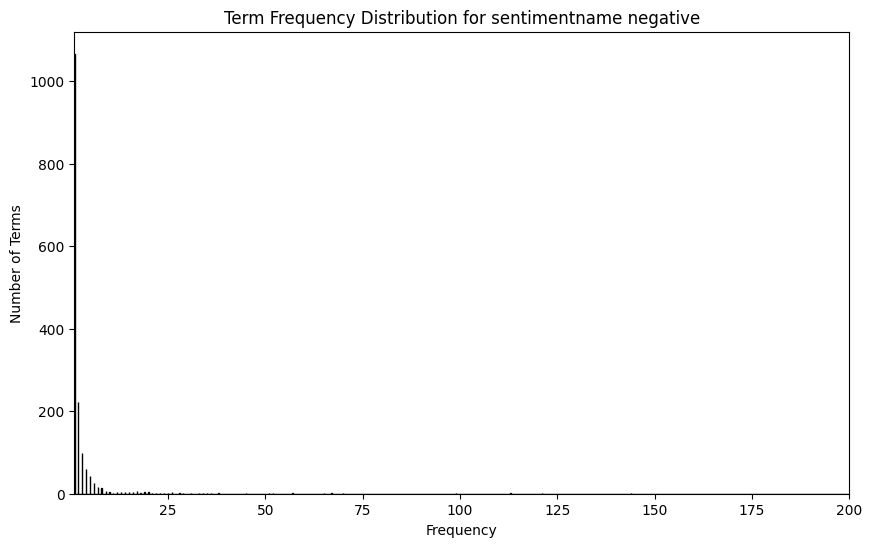

In [27]:
_number = 0 
word_counts = filt_term_document_dfs[sentimentnames[_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for sentimentname {sentimentnames[_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#### 看前5%的字

In [28]:
_number=0
word_counts = filt_term_document_dfs[sentimentnames[_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentimentnames[_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"sentimentname: {sentimentnames[_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

sentimentname: negative
Number of terms in top 5%: 81
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'you', 'for', 'he', 'are', 'trump', 'if', 'they', 'so', 'on', 'be', 'will', 'but', 'as', 'just', 'not', 'us', 'with', 'can', 'what', 'have', 'like', 'at', 'all', 'his', 'was', 'think', 'about', 'my', 'or', 'now', 'people', 'an', 'even', 're', 'their', 'we', 'when', 'bad', 'going', 'china', 'has', 'tariffs', 'more', 'no', 'fuck', 'from', 'market', 'him', 'than', 'money', 'up', 'see', 'there', 'do', 'how', 'by', 'silver', 'out', 'one', 'only', 'go', 'why', 'down', 'still', 'me', 'long', 'shit', 'economy', 'want', 'some', 'make', 'too']


#### 看後1%的字

In [29]:
# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentimentnames[_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"sentimentname: {sentimentnames[_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


sentimentname: negative
Number of terms in bottom 1%: 16
Filtered terms: ['wit', 'writing', '17th', 'ws', 'wsb', 'xeqt', '1700', 'ya', '2011', '2s', '11', '125', '13', '140', 'portfolios', 'poses']


### 刪除出現頻率 前5% 和 後1% 的字

In [30]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# 將三個詞彙-文件頻率表存入字典(去除 前5% 和 後1% 的字)
term_document_dfs = {}

for sentimentname in sentimentnames:
    term_document_dfs[sentimentname] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentimentname])

term_document_dfs['positive']

00  000  06  08  100  1000  10000  10k  11  116  ...  yield  yields  \
0     0    0   0   0    0     0      0    0   0    0  ...      0       0   
1     0    0   0   0    0     0      0    0   0    3  ...      0       0   
2     0    0   0   0    0     0      0    0   0    0  ...      0       0   
3     0    0   0   0    0     0      0    0   0    0  ...      0       0   
4     0    0   0   0    0     0      0    0   0    0  ...      0       0   
..   ..  ...  ..  ..  ...   ...    ...  ...  ..  ...  ...    ...     ...   
314   0    0   0   0    0     0      0    0   0    0  ...      0       0   
315   0    0   0   0    0     0      0    0   0    0  ...      0       0   
316   0    0   0   0    0     0      0    0   0    0  ...      0       0   
317   0    0   0   0    0     0      0    0   0    0  ...      0       0   
318   0    0   0   0    0     0      0    0   0    0  ...      0       0   

     yippee  yo  young  yours  yourself  yoyo  zero  zgld  
0         0   0      0      0         0     0     0     0  
1         0   0      0      0         0     0     0     0  
2         0   0      0      0         0     0     0     0  
3         0   0      0      0         0     0     0     0  
4         0   0      0      0         0     0     0     0  
..      ...  ..    ...    ...       ...   ...   ...   ...  
314       0   0      0      0         0     0     0     0  
315       0   0      0      0         0     0     0     0  
316       0   0      0      0         0     0     0     0  
317       0   0      0      0         0     0     0     0  
318       0   0      0      0         0     0     0     0  

[319 rows x 2940 columns]

### >>> **Exercise 16 :** 

In [31]:
# Answer here
'''
在被過濾掉的詞中，每個類別的 top 5% 有許多相同的詞，像是 the, of, and, is...
因為他們不帶有明顯語意，僅具有語法功能，
因此他們在常見的資料探勘工具中會被歸類在 停用詞 (stop words)，會在前處理階段移除。

相對地，在 bottom 1% 低頻詞中，各個類別所出現的詞差異較大
不像master中的案例有很多前綴有0的數字、非單字的英文字、含有特殊符號的英文字(例如: _if)，這些詞往往缺乏語意資訊，甚至可能只是資料中的 noise 因此也常被排除在分析之外。
在homework中的字,是數字和出現頻率很低的字。
'''

'\n在被過濾掉的詞中，每個類別的 top 5% 有許多相同的詞，像是 the, of, and, is...\n因為他們不帶有明顯語意，僅具有語法功能，\n因此他們在常見的資料探勘工具中會被歸類在 停用詞 (stop words)，會在前處理階段移除。\n\n相對地，在 bottom 1% 低頻詞中，各個類別所出現的詞差異較大\n不像master中的案例有很多前綴有0的數字、非單字的英文字、含有特殊符號的英文字(例如: _if)，這些詞往往缺乏語意資訊，甚至可能只是資料中的 noise 因此也常被排除在分析之外。\n在homework中的字,是數字和出現頻率很低的字。\n'

### 使用 PAMI 將詞彙-文件頻率表轉換成交易資料庫

In [32]:
from PAMI.extras.convert.DF2DB import DF2DB 
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg

In [33]:
## 解決 encoding 問題
import builtins
_orig_open = open
def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)
builtins.open = safe_open

In [34]:
# Loop through the dictionary of term-document DataFrames
for sentimentname in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentimentname_safe = sentimentname.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentimentname])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentimentname_safe}.csv', '>=', 1)

#### 看 Negative TransactionalDatabase 的資訊:

Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.681388012618296
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.259781119469036
Variance in Transaction Sizes : 497.0658866749191
Sparsity : 0.9943260584991094


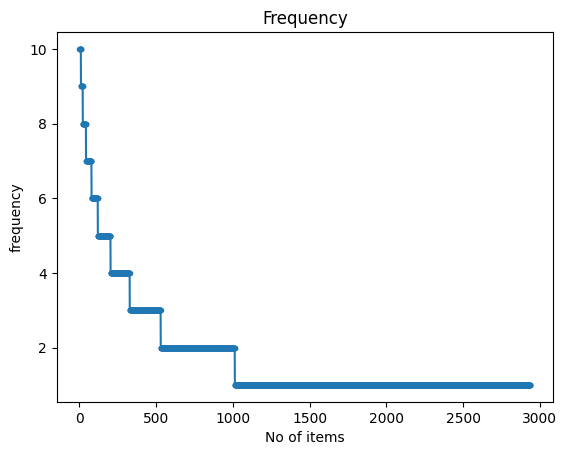

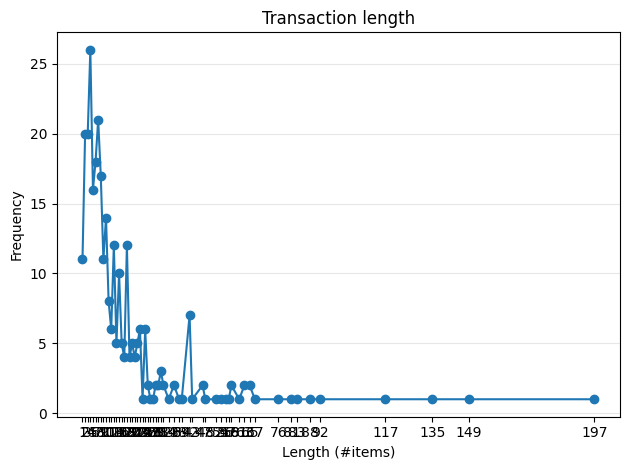

In [35]:
'''
- 項目出現頻率：
    第一張圖顯示，大多數的項目在交易中出現的次數很少。項目的出現頻率下降得非常快，代表我們的資料中有大量項目其實很少被使用。
- 交易長度：
    第二張圖顯示，大多數交易只包含少量項目。也就是說，最常見的交易都很短，這與我們之前發現的「資料集中項目組合不多」的情況一致。   

把焦點放在那些在小型、常見交易中重複出現的項目組合上。 
'''
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### 設定「最小支持度（minSup）」

In [36]:
minSup = 5
frequentPatternsDF = {}  # 用來儲存每個 label 對應的 frequentPatterns DataFrame

for sentimentname in ['positive', 'neutral', 'negative']:
    input_file = f'td_freq_db_{sentimentname}.csv'
    obj = alg.FPGrowth(iFile=input_file, minSup=minSup)
    obj.mine()
    freq_df = obj.getPatternsAsDataFrame()
    
    print(f'sentimentname: {sentimentname}')
    print('Patterns found:', len(freq_df))

    #output_file = f'freq_patterns_{sentimentname}_minSup5.csv'
    #freq_df.to_csv(output_file, encoding='utf-8-sig')
    output_file = f'freq_patterns_{sentimentname}_minSup5.txt'
    obj.save(output_file)

    frequentPatternsDF[sentimentname] = freq_df

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
sentimentname: positive
Patterns found: 221
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
sentimentname: neutral
Patterns found: 2098
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
sentimentname: negative
Patterns found: 85


In [37]:
frequentPatternsDF['positive']

Patterns  Support
0        deal        5
1         isn        5
2      record        5
3        line        5
4       maybe        5
..        ...      ...
216     today       10
217   america       10
218    thanks       10
219  everyone       10
220    always       10

[221 rows x 2 columns]

### 過濾掉在多個類別中都出現的共同模式

In [38]:

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF['positive'], frequentPatternsDF['neutral'], frequentPatternsDF['negative']]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(d) for d in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
177  america       10
176    today       10
173   pretty       10
175    where       10
174  country       10
..       ...      ...
12    demand        5
13      fast        5
14    growth        5
15   insider        5
1       line        5

[2305 rows x 2 columns]
Number of patterns discarded: 99


#### 將這些模式轉換成二元特徵（binary features），並新增到我們的**文件-詞矩陣（document-term matrix）**中。

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df.text)
terms = count_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  01378  02  027  03  06  08  10  100  ...  idea  past  guy  30  \
0     0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
1     0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
2     0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
3     0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
4     0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...   ...   ...  ...  ..   
842   0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
843   0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
844   0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
845   0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   
846   0    0      0   0    0   0   0   0   0    0  ...     0     0    0   0   

     cost  demand  fast  growth  insider  line  
0       0       0     0       0        0     0  
1       0       0     0       0        0     0  
2       0       0     0       0        0     0  
3       0       0     0       0        0     0  
4       0       0     0       0        0     0  
..    ...     ...   ...     ...      ...   ...  
842     0       0     0       0        0     0  
843     0       0     0       0        0     0  
844     0       0     0       0        0     0  
845     0       0     0       0        0     0  
846     0       0     0       0        0     0  

[847 rows x 6651 columns]

### >>> **Exercise 17 :** Implement the FAE Top-K and MaxFPGrowth algorithms 以 positive 為例

##### FAE_TopK : 挖掘前 K 個最有代表性的 frequent patterns

In [40]:
from PAMI.frequentPattern.topk import FAE  as alg

iFile='td_freq_db_neutral.csv'
outFile='frequentPatterns_hw_topk100.txt'
kCount=100 
seperator='\t'

obj = alg.FAE(iFile=iFile, k=kCount, sep=seperator)
obj.mine()
frequentPatternsDF_neutral= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
obj.save(outFile=outFile)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.054541826248168945


In [41]:
iFile='td_freq_db_neutral.csv'
outFile='frequentPatterns_hw_topk300.txt'
kCount=300 
seperator='\t'

obj = alg.FAE(iFile=iFile, k=kCount, sep=seperator)
obj.mine()
frequentPatternsDF_neutral= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
obj.save(outFile=outFile)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.15826892852783203


In [42]:
iFile='td_freq_db_neutral.csv'
outFile='frequentPatterns_hw_topk500.txt'
kCount=500 
seperator='\t'

obj = alg.FAE(iFile=iFile, k=kCount, sep=seperator)
obj.mine()
frequentPatternsDF_neutral= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
obj.save(outFile=outFile)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 37.467047929763794


##### MaxFPGrowth : 挖掘最大頻繁項集（Maximal Frequent Itemsets）

In [43]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

outFile='maximalFrequentPatterns_hw_MaxFPGrowth2.txt'
minSup = 2
seperator='\t'

obj = alg.MaxFPGrowth(iFile=iFile, minSup=minSup, sep=seperator)
obj.mine()       

frequentPatternsDF= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

obj.save(outFile=outFile) 

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 286
Runtime: 0.008903026580810547


In [44]:
outFile='maximalFrequentPatterns_hw_MaxFPGrowth4.txt'
minSup = 4
seperator='\t'

obj = alg.MaxFPGrowth(iFile=iFile, minSup=minSup, sep=seperator)
obj.mine()       

frequentPatternsDF= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

obj.save(outFile=outFile) 

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 84
Runtime: 0.0064580440521240234


In [45]:
outFile='maximalFrequentPatterns_hw_MaxFPGrowth6.txt'
minSup = 6
seperator='\t'

obj = alg.MaxFPGrowth(iFile=iFile, minSup=minSup, sep=seperator)
obj.mine()       

frequentPatternsDF= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

obj.save(outFile=outFile) 

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 28
Runtime: 0.002902507781982422


##### 比較 FPGrowth、FAE_TopK 和 MaxFPGrowth

In [46]:
'''輸出的差異與相似性、各方法在效能上的表現比較'''

'''
FPGrowth
    控制參數:minSup
    輸出:輸出所有 support ≥ minSup 的 frequent patterns, 可能產生大量重複或包含關係的模式
    執行時間:通常最慢
    記憶體消耗:高，可能導致記憶體爆炸或結果過多
FAE_TopK
    控制參數:topK
    輸出:只輸出 Top-K 個 support 最高的 patterns
    執行時間:通常最快，因為只找前 K 名
    記憶體消耗:低
MaxFPGrowth
    控制參數:minSup
    輸出:只保留不被其他 pattern 包含的「最大」模式（不含子集）
    執行時間:中等
    記憶體消耗:中等
'''

'\nFPGrowth\n    控制參數:minSup\n    輸出:輸出所有 support ≥ minSup 的 frequent patterns, 可能產生大量重複或包含關係的模式\n    執行時間:通常最慢\n    記憶體消耗:高，可能導致記憶體爆炸或結果過多\nFAE_TopK\n    控制參數:topK\n    輸出:只輸出 Top-K 個 support 最高的 patterns\n    執行時間:通常最快，因為只找前 K 名\n    記憶體消耗:低\nMaxFPGrowth\n    控制參數:minSup\n    輸出:只保留不被其他 pattern 包含的「最大」模式（不含子集）\n    執行時間:中等\n    記憶體消耗:中等\n'

### >>> **Exercise 18 :** PCA, TSNE, UMAP 壓縮至三維 並畫圖

In [47]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### 利用 Axes3D 畫 tdm_df 的 3D 分布圖 (PCA, TSNE, UMAP)

In [48]:
df_pca3_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
df_tsne3_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
df_umap3_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

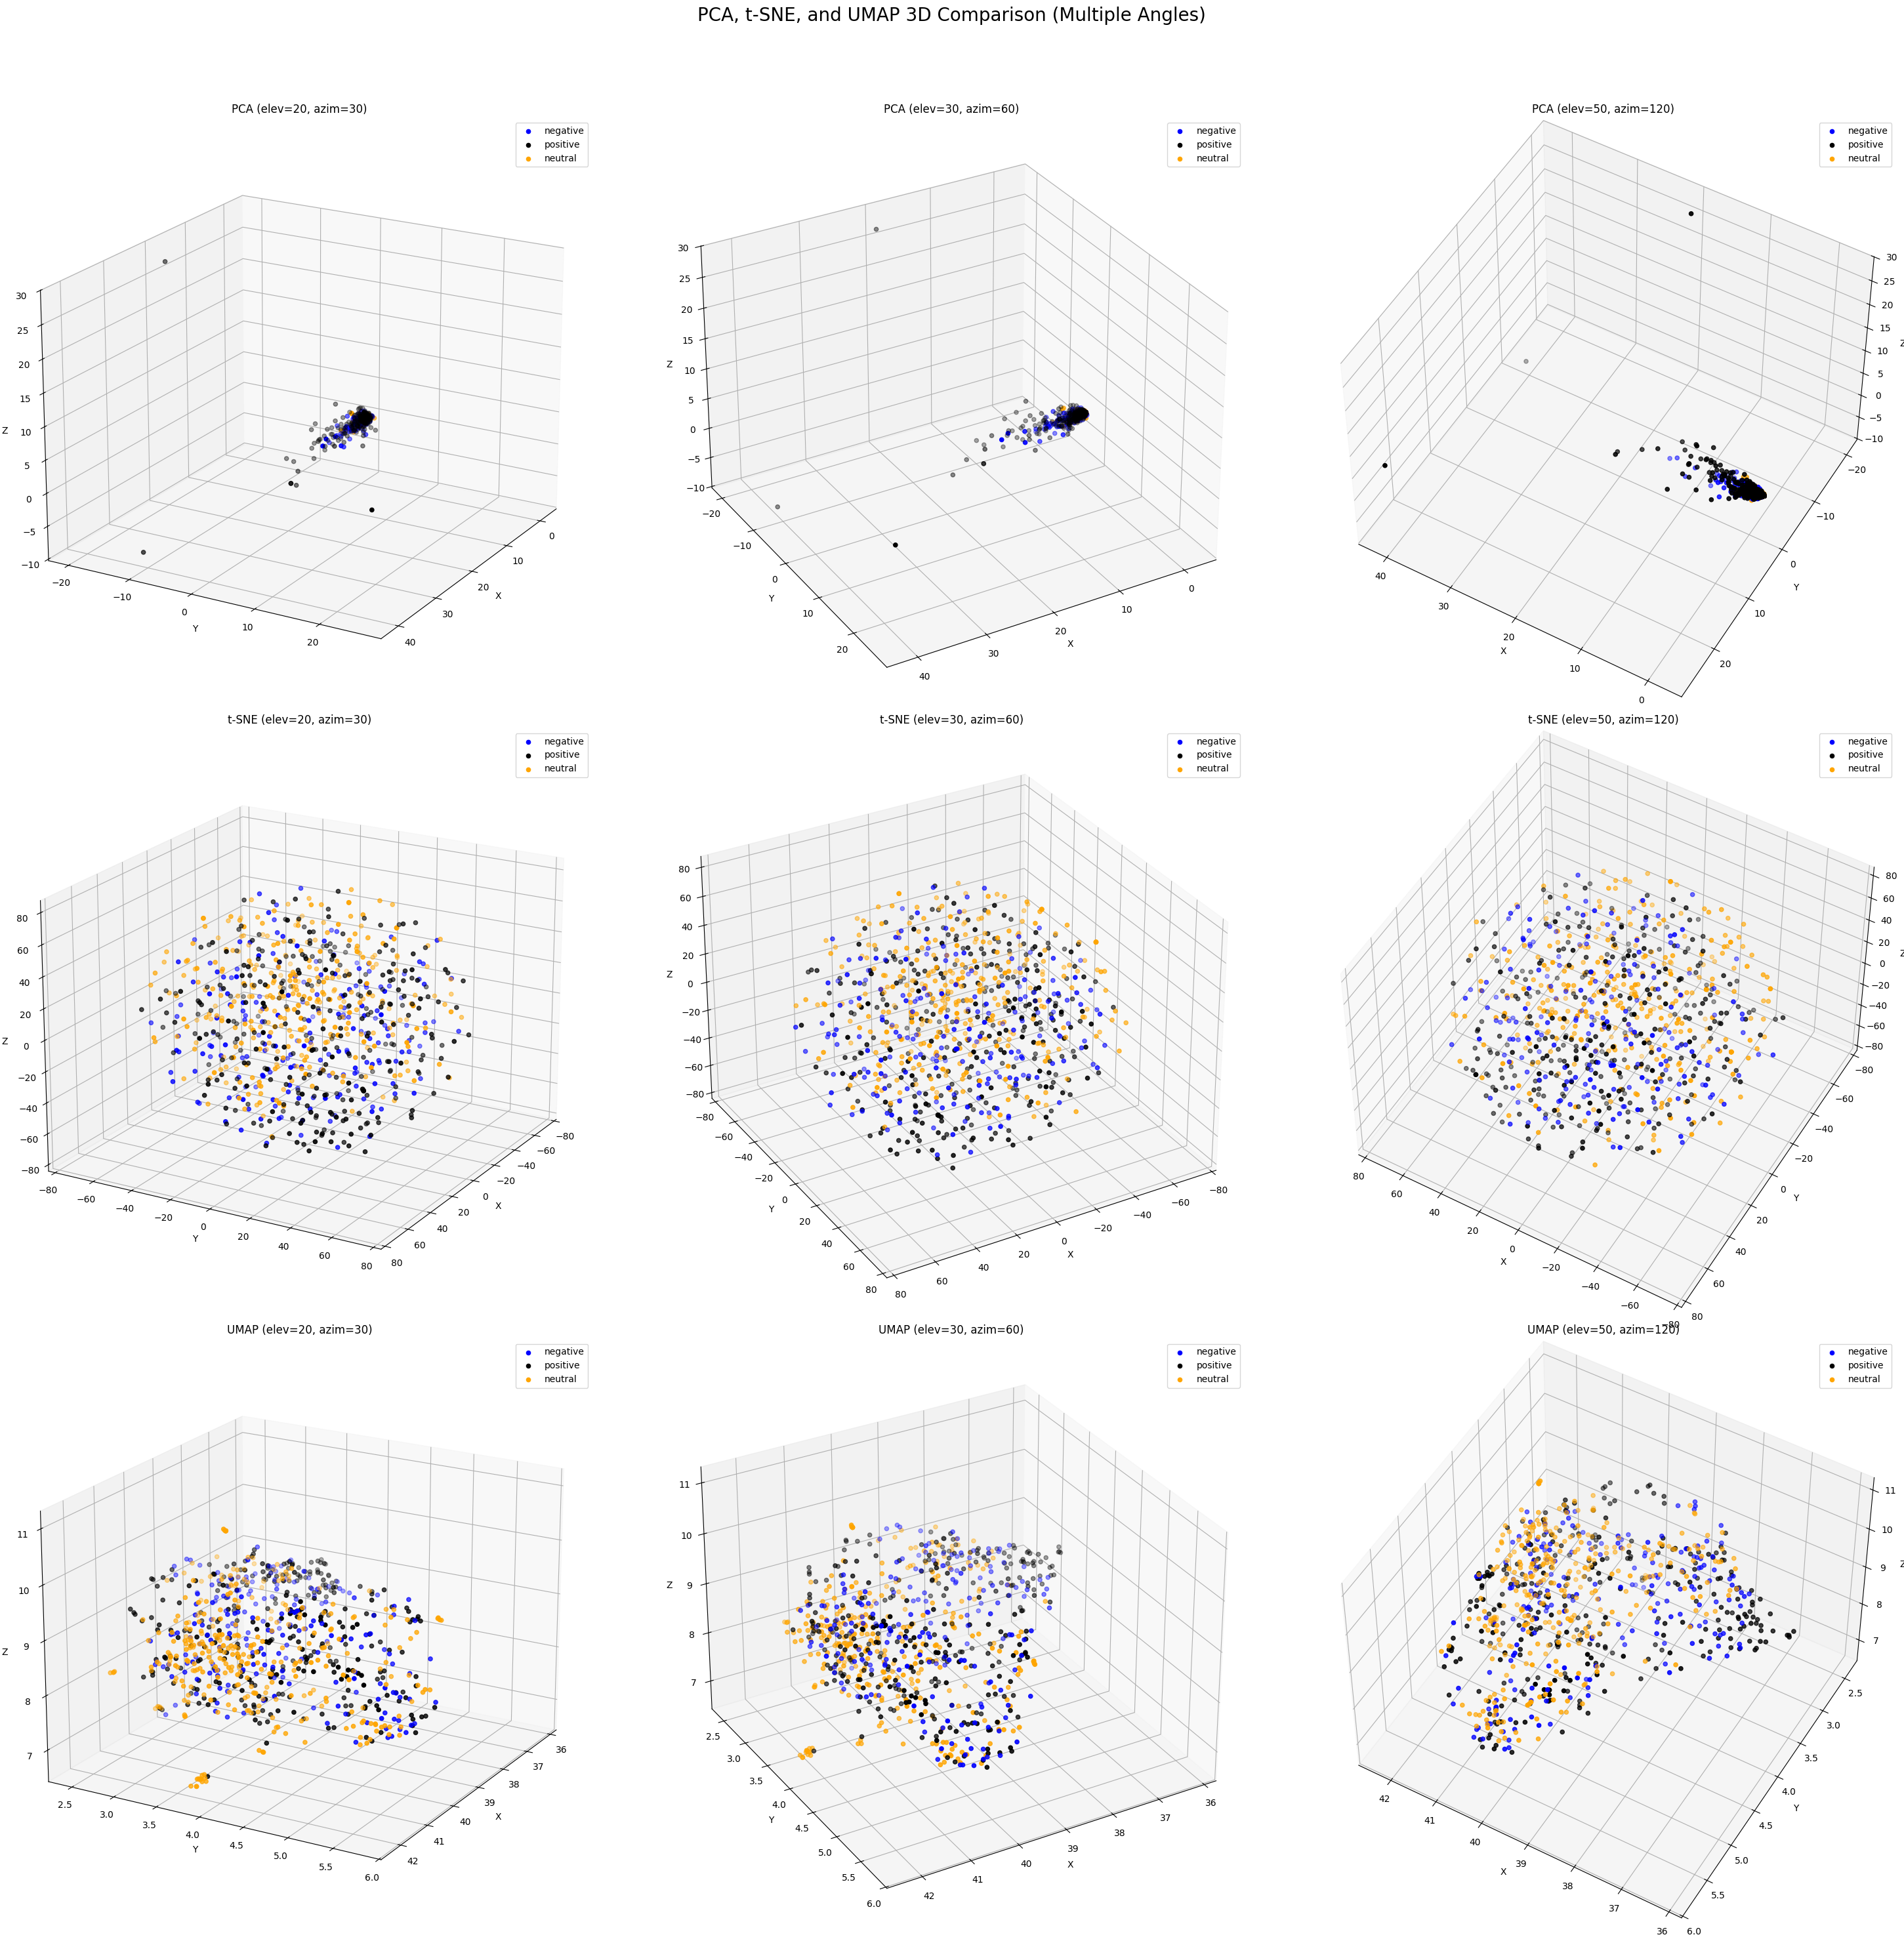

In [49]:
col = ['blue', 'black', 'orange']
categories = df['sentimentname'].unique()

# 9 個子圖 (3 方法 × 3 視角)
fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison (Multiple Angles)', fontsize=20)

# 三種降維資料
reduced_data = {
    'PCA': df_pca3_tdm,
    't-SNE': df_tsne3_tdm,
    'UMAP': df_umap3_tdm
}

# 三個視角 (elev仰角, azim方位角)
angles = [(20, 30), (30, 60), (50, 120)]

# 定義 3D scatter plot 函數
def plot_scatter_3d(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentimentname'] == category][:, 0]
        ys = X_reduced[df['sentimentname'] == category][:, 1]
        zs = X_reduced[df['sentimentname'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(f'{title} (elev={angle[0]}, azim={angle[1]})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.legend(loc='upper right')

# 繪製 9 個子圖
subplot_idx = 1
for method_name, X_reduced in reduced_data.items():
    for angle in angles:
        ax = fig.add_subplot(3, 3, subplot_idx, projection='3d')
        plot_scatter_3d(ax, X_reduced, method_name, angle)
        subplot_idx += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 保留 suptitle 空間
plt.show()

##### 利用 Axes3D 畫 aug_df 的 3D 分布圖 (PCA, TSNE, UMAP)

In [50]:
df_pca3_aug = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne3_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap3_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

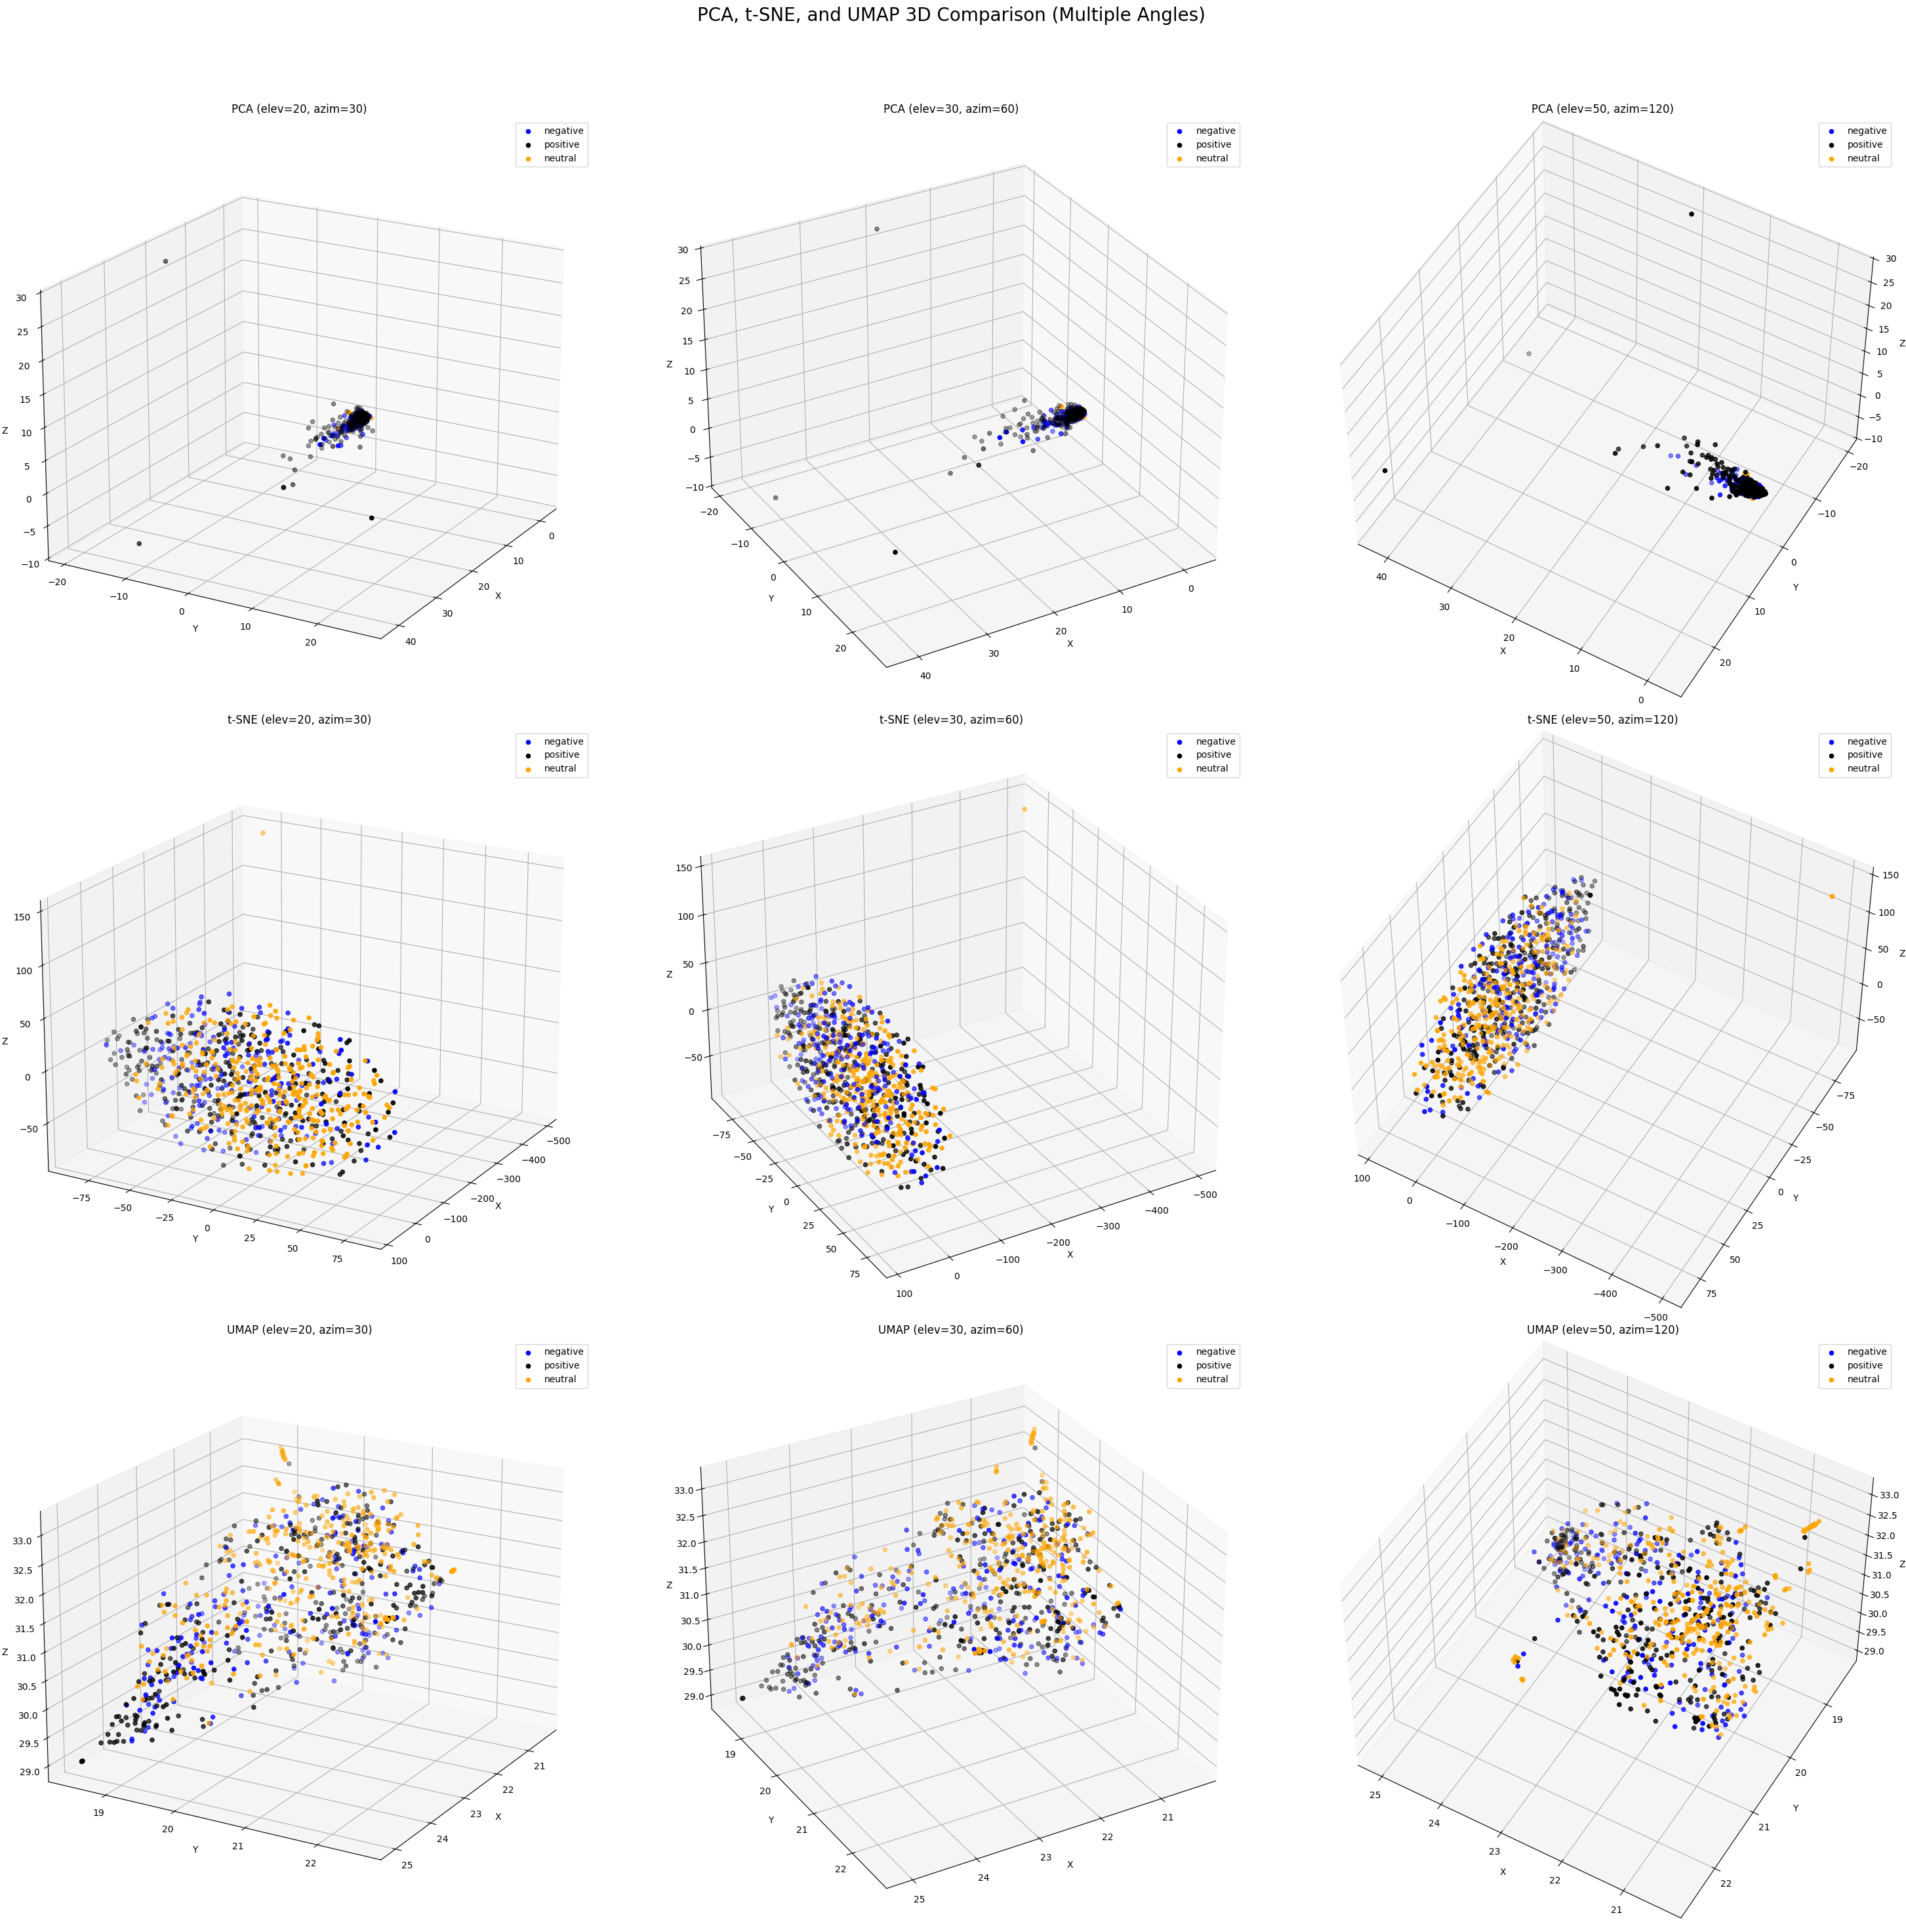

In [51]:
col = ['blue', 'black', 'orange']
categories = df['sentimentname'].unique()

# 9 個子圖 (3 方法 × 3 視角)
fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP 3D Comparison (Multiple Angles)', fontsize=20)

# 三種降維資料
reduced_data = {
    'PCA': df_pca3_aug,
    't-SNE': df_tsne3_aug,
    'UMAP': df_umap3_aug
}

# 三個視角 (elev仰角, azim方位角)
angles = [(20, 30), (30, 60), (50, 120)]

# 定義 3D scatter plot 函數
def plot_scatter_3d(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentimentname'] == category][:, 0]
        ys = X_reduced[df['sentimentname'] == category][:, 1]
        zs = X_reduced[df['sentimentname'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(f'{title} (elev={angle[0]}, azim={angle[1]})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.legend(loc='upper right')

# 繪製 9 個子圖
subplot_idx = 1
for method_name, X_reduced in reduced_data.items():
    for angle in angles:
        ax = fig.add_subplot(3, 3, subplot_idx, projection='3d')
        plot_scatter_3d(ax, X_reduced, method_name, angle)
        subplot_idx += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 保留 suptitle 空間
plt.show()

##### 說明

In [52]:
'''
比較 tdm_df 和 aug_df，三維和二維的結果相似:
    PCA 無法很好的處理 non-linear 的資料(document-term matrix)
    t-SNE 資料在圖上變得聚集
    UMAP 資料在圖上沒有改變太多
'''

'\n比較 tdm_df 和 aug_df，三維和二維的結果相似:\n    PCA 無法很好的處理 non-linear 的資料(document-term matrix)\n    t-SNE 資料在圖上變得聚集\n    UMAP 資料在圖上沒有改變太多\n'

### >>> **Exercise 19 :** Discretization and Binarization，將類別資料轉換成 one hot 表示

In [53]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [54]:
'''
說明: bin_category 有正確地對應到 sentimentname
'''
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentimentname)
df['bin_category'] = mlb.transform(df['sentimentname']).tolist()
df.loc[0:9, ['sentimentname', 'bin_category']]

sentimentname bin_category
0      negative    [1, 0, 0]
1      positive    [0, 0, 1]
2       neutral    [0, 1, 0]
3      positive    [0, 0, 1]
4       neutral    [0, 1, 0]
5      positive    [0, 0, 1]
6      negative    [1, 0, 0]
7      positive    [0, 0, 1]
8      positive    [0, 0, 1]
9       neutral    [0, 1, 0]

### >>> **Exercise 20 :** 利用 cosine_similarity 計算文本相似度，並說明結果

In [55]:
document_to_transform_1 = []
random_record_1 = df.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Yup - money, money']
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']


In [56]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.109109
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\NPC\AppData\Local\Temp\ipykernel_6244\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\NPC\AppData\Local\Temp\ipykernel_6244\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\NPC\AppData\Local\Temp\ipykernel_6244\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\NPC\AppData\Local\Temp\ipykernel_6244\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is de

In [58]:
'''
結果說明
cosine similarity:
    1 → 兩個文本非常相似（向量方向幾乎一致）
    0 → 兩個文本完全不相似（向量垂直）

任何文本和自己本身的餘弦相似度為 1
以 id = 10, 50, 100 為例:
id 10 和 id 100 有較高的餘弦相似度(0.1091)，但文本僅有一點相似
id 10 和 id 50 有較低的餘弦相似度(0.0000)，文本完全不同
id 50 和 id 100 有較低的餘弦相似度(0.0000)，文本完全不同

餘弦相似度皆很低的原因可能因為文本較短，且不像Master的資料有相似的格式
'''

'\n結果說明\ncosine similarity:\n    1 → 兩個文本非常相似（向量方向幾乎一致）\n    0 → 兩個文本完全不相似（向量垂直）\n\n任何文本和自己本身的餘弦相似度為 1\n以 id = 10, 50, 100 為例:\nid 10 和 id 100 有較高的餘弦相似度(0.1091)，但文本僅有一點相似\nid 10 和 id 50 有較低的餘弦相似度(0.0000)，文本完全不同\nid 50 和 id 100 有較低的餘弦相似度(0.0000)，文本完全不同\n\n餘弦相似度皆很低的原因可能因為文本較短，且不像Master的資料有相似的格式\n'

### >>> **Exercise 21 :** 用 augmented data 在 Naive Bayes 訓練

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [60]:
sentiment_mapping = dict(df[['sentiment', 'sentimentname']].drop_duplicates().values)
# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

##### 先用原本的 tdm_df 訓練 Naive bayes model

In [61]:
# 拆分資料集
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

# 建立模型並訓練
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 使用訓練好的模型對測試集特徵 X_test 進行預測
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4823529411764706

Classification Report:
               precision    recall  f1-score   support

    negative     0.2857    0.3137    0.2991        51
     neutral     0.7234    0.3238    0.4474       105
    positive     0.4803    0.7374    0.5817        99

    accuracy                         0.4824       255
   macro avg     0.4965    0.4583    0.4427       255
weighted avg     0.5415    0.4824    0.4698       255



##### 利用 augmented data 訓練 Naive bayes model

In [62]:
# 拆分資料集
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# 建立模型並訓練
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 使用訓練好的模型對測試集特徵 X_test 進行預測
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.3750    0.2353    0.2892        51
     neutral     0.7632    0.2762    0.4056       105
    positive     0.4541    0.8485    0.5915        99

    accuracy                         0.4902       255
   macro avg     0.5307    0.4533    0.4288       255
weighted avg     0.5655    0.4902    0.4545       255



### >>> **Exercise 22 :**  說明 original TDM 和 augmented TDM 的預測結果

In [63]:
'''
整體來說 augmented TDM 的預測結果比 original TDM 還好，大部分的分數都比較高
只有在某些類別中 augmented TDM 的 precision 和 recall 比較低
也就是說加入 pattern 特徵是一個有效的資料增強方法

他們都在資料較多的 neutral 類別中有較高的 precision
在 positive 類別中有較高的 recall 和 f1-score
'''

'\n整體來說 augmented TDM 的預測結果比 original TDM 還好，大部分的分數都比較高\n只有在某些類別中 augmented TDM 的 precision 和 recall 比較低\n也就是說加入 pattern 特徵是一個有效的資料增強方法\n\n他們都在資料較多的 neutral 類別中有較高的 precision\n在 positive 類別中有較高的 recall 和 f1-score\n'

### >>> **Exercise 23 :** 比較 Decision Tree 和 Naive Bayes 的分數

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

##### 先用原本的 tdm_df 訓練 Decision Tree

In [65]:
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6235294117647059

Classification Report:
               precision    recall  f1-score   support

    negative     0.4103    0.3137    0.3556        51
     neutral     0.6695    0.7524    0.7085       105
    positive     0.6531    0.6465    0.6497        99

    accuracy                         0.6235       255
   macro avg     0.5776    0.5709    0.5713       255
weighted avg     0.6113    0.6235    0.6151       255



##### 說明結果: 比較 Decision Tree 和 Naive Bayes 的分數

In [66]:
'''
整體來說 Decision tree 的分數高於 Naive Bayes
類別之間的分數也比較均勻
可能是因為 homework 的資料集較小且維度較低的關係，使得 Decision tree 有較好的表現
'''

'\n整體來說 Decision tree 的分數高於 Naive Bayes\n類別之間的分數也比較均勻\n可能是因為 homework 的資料集較小且維度較低的關係，使得 Decision tree 有較好的表現\n'

### >>> **Exercise 24 :** 利用 augmented data 訓練 Decision Tree，並說明結果

In [67]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (augmented TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented TDM): 0.615686274509804

Classification Report:
               precision    recall  f1-score   support

    negative     0.3556    0.3137    0.3333        51
     neutral     0.6724    0.7429    0.7059       105
    positive     0.6702    0.6364    0.6528        99

    accuracy                         0.6157       255
   macro avg     0.5661    0.5643    0.5640       255
weighted avg     0.6082    0.6157    0.6108       255



##### 說明結果

In [68]:
'''
和原本的結果相比利用 augmented data 訓練 Decision Tree 並沒有獲得比較高的準確率
可能是因為 homework 的句子短很多，所以獲得 patterns 的效果沒有那麼好
(patterns 很短且很少句子有共同的 pattern)
'''

'\n和原本的結果相比利用 augmented data 訓練 Decision Tree 並沒有獲得比較高的準確率\n可能是因為 homework 的句子短很多，所以獲得 patterns 的效果沒有那麼好\n(patterns 很短且很少句子有共同的 pattern)\n'

### >>> **Exercise 25 :** 說明應該如何為特定任務選擇最佳模型

In [69]:
'''
我會先分析任務的類型和資料的型態，找尋可能適合的模型
再對資料進行分析與前處理，使其更適合模型，以提升結果
最後利用預測分數比較不同的模型，選擇最適合的模型

若是利用文本內容進行分類的問題，我會優先考慮 Naive Bayes
但是這次的資料集很小，文字內容也較短
根據結果顯示 Decision Tree 的效果較好，所以這個任務會選擇使用 Decision Tree
'''

'\n我會先分析任務的類型和資料的型態，找尋可能適合的模型\n再對資料進行分析與前處理，使其更適合模型，以提升結果\n最後利用預測分數比較不同的模型，選擇最適合的模型\n\n若是利用文本內容進行分類的問題，我會優先考慮 Naive Bayes\n但是這次的資料集很小，文字內容也較短\n根據結果顯示 Decision Tree 的效果較好，所以這個任務會選擇使用 Decision Tree\n'